# Kihívás: Szövegelemzés az Adattudományról

Ebben a példában végezzünk el egy egyszerű gyakorlatot, amely lefedi az adattudomány hagyományos folyamatának minden lépését. Nem kell kódot írnod, egyszerűen kattints az alábbi cellákra, hogy végrehajtsd őket, és figyeld meg az eredményt. Kihívásként bátorítunk, hogy próbáld ki ezt a kódot különböző adatokkal is.

## Cél

Ebben a leckében különböző, az adattudományhoz kapcsolódó fogalmakról beszéltünk. Próbáljunk meg további kapcsolódó fogalmakat felfedezni egy kis **szövegbányászat** segítségével. Egy adattudományról szóló szöveggel kezdünk, kulcsszavakat vonunk ki belőle, majd megpróbáljuk vizualizálni az eredményt.

A szöveghez a Wikipédia Adattudományról szóló oldalát fogom használni:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## 1. lépés: Az adatok beszerzése

Az adatkutatási folyamat első lépése az adatok beszerzése. Ehhez a `requests` könyvtárat fogjuk használni:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## 2. lépés: Az adatok átalakítása

A következő lépés az adatok olyan formába történő átalakítása, amely alkalmas a feldolgozásra. Esetünkben letöltöttük az oldal HTML forráskódját, és ezt egyszerű szöveggé kell alakítanunk.

Számos módja van ennek megvalósítására. Mi a legegyszerűbb beépített [HTMLParser](https://docs.python.org/3/library/html.parser.html) objektumot fogjuk használni Pythonból. Ehhez alosztályt kell létrehoznunk az `HTMLParser` osztályból, és meg kell határoznunk a kódot, amely összegyűjti az összes szöveget a HTML tagek között, kivéve a `<script>` és `<style>` tageket.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## 3. lépés: Elemzések nyerése

A legfontosabb lépés az, hogy az adatainkat olyan formába hozzuk, amelyből következtetéseket vonhatunk le. Esetünkben kulcsszavakat szeretnénk kinyerni a szövegből, és megvizsgálni, mely kulcsszavak a legjelentősebbek.

Egy Python könyvtárat fogunk használni, amelynek neve [RAKE](https://github.com/aneesha/RAKE), kulcsszókivonásra. Először telepítsük ezt a könyvtárat, ha még nincs telepítve:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


A fő funkció az `Rake` objektumból érhető el, amelyet néhány paraméter segítségével testre szabhatunk. Esetünkben a kulcsszó minimális hosszát 5 karakterre, a kulcsszó minimális gyakoriságát a dokumentumban 3-ra, és a kulcsszó maximális szavainak számát 2-re állítjuk. Nyugodtan kísérletezz más értékekkel, és figyeld meg az eredményt.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Megszereztünk egy listát a kifejezésekről azok fontossági fokával együtt. Ahogy látható, a legrelevánsabb területek, mint például a gépi tanulás és a big data, a lista élén szerepelnek.

## 4. lépés: Az eredmény vizualizálása

Az emberek vizuális formában tudják a legjobban értelmezni az adatokat. Ezért gyakran van értelme az adatok vizualizálásának, hogy bizonyos következtetéseket vonhassunk le. Használhatjuk a `matplotlib` könyvtárat Pythonban, hogy egyszerűen ábrázoljuk a kulcsszavak eloszlását azok relevanciájával együtt:


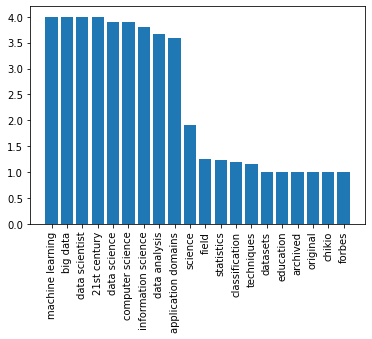

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Van azonban egy még jobb módja a szavak gyakoriságának vizualizálására - a **Word Cloud** használatával. Szükségünk lesz egy másik könyvtár telepítésére, hogy a kulcsszólistánkból szófelhőt készítsünk.


In [71]:
!{sys.executable} -m pip install wordcloud

A `WordCloud` objektum feladata, hogy vagy az eredeti szöveget, vagy az előre kiszámított szavak listáját azok gyakoriságával fogadja, és egy képet ad vissza, amelyet ezután a `matplotlib` segítségével lehet megjeleníteni:


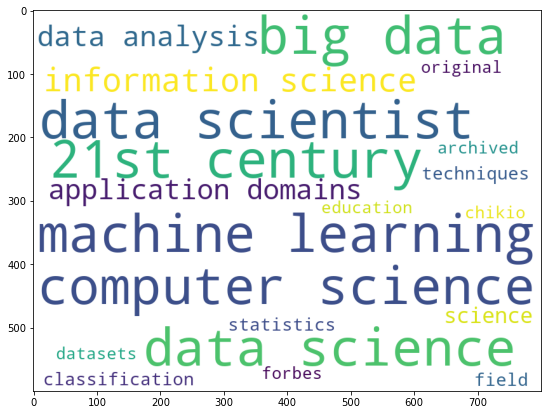

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Az eredeti szöveget is átadhatjuk a `WordCloud`-nak - nézzük meg, hogy hasonló eredményt kapunk-e:


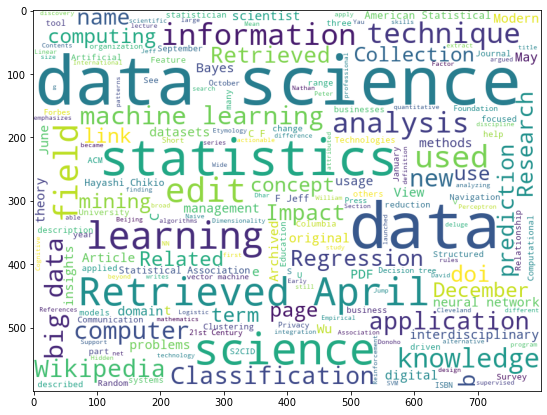

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Látható, hogy a szófelhő most sokkal lenyűgözőbb, de ugyanakkor sok zajt is tartalmaz (például olyan nem kapcsolódó szavakat, mint `Retrieved on`). Emellett kevesebb olyan kulcsszót kapunk, amelyek két szóból állnak, mint például *data scientist* vagy *computer science*. Ennek az az oka, hogy a RAKE algoritmus sokkal jobb munkát végez a jó kulcsszavak kiválasztásában a szövegből. Ez a példa jól szemlélteti az adat-előfeldolgozás és tisztítás fontosságát, mivel a végén egy tiszta kép lehetővé teszi számunkra, hogy jobb döntéseket hozzunk.

Ebben a gyakorlatban egy egyszerű folyamatot követtünk végig, amely során némi jelentést nyertünk ki a Wikipédia szövegéből kulcsszavak és szófelhő formájában. Ez a példa meglehetősen egyszerű, de jól bemutatja azokat a tipikus lépéseket, amelyeket egy adatkutató megtesz, amikor adatokkal dolgozik, kezdve az adatgyűjtéstől egészen a vizualizációig.

A kurzusunk során részletesen megvitatjuk ezeket a lépéseket.



---

**Felelősség kizárása**:  
Ez a dokumentum az AI fordítási szolgáltatás, a [Co-op Translator](https://github.com/Azure/co-op-translator) segítségével lett lefordítva. Bár törekszünk a pontosságra, kérjük, vegye figyelembe, hogy az automatikus fordítások hibákat vagy pontatlanságokat tartalmazhatnak. Az eredeti dokumentum az eredeti nyelvén tekintendő hiteles forrásnak. Kritikus információk esetén javasolt professzionális emberi fordítást igénybe venni. Nem vállalunk felelősséget semmilyen félreértésért vagy téves értelmezésért, amely a fordítás használatából eredhet.
